In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)


In [14]:
# Create an empty list to store the DataFrames
dfs = []

N_sims = 99

# Loop through the file names
for i in range(1, N_sims + 1):
    file_name = f'../data/values_estimation_blp_{i}.csv'  # Assuming the files are in CSV format
    
    # Read the file as a DataFrame
    df = pd.read_csv(file_name)
    
    # Add a simulation number column
    df['simulation_number'] = i
    
    # Append the DataFrame to the list
    dfs.append(df)

# Concatenate all the DataFrames into one
combined_df = pd.concat(dfs, ignore_index=True)
print(combined_df.shape)
df3 = combined_df[combined_df['sigma_blp'] >= 0.03]  
df3 = combined_df[combined_df['sigma_rcl'] >= 0.03]  



(99, 19)


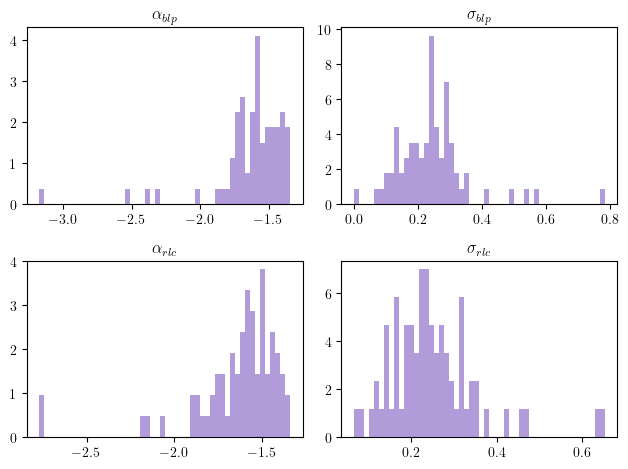

In [15]:

fig, ax = plt.subplots(2, 2)

purple_color = '#B19CD9'  # Pastel purple color

ax[0, 0].hist(df3['a_blp'], bins=50, density=True, color=purple_color)
ax[0, 0].set_title('$\\alpha_{blp}$')

ax[0, 1].hist(df3['sigma_blp'], bins=50, density=True, color=purple_color)
ax[0, 1].set_title('$\\sigma_{blp}$')

ax[1, 0].hist(df3['a_rcl'], bins=50, density=True, color=purple_color)
ax[1, 0].set_title('$\\alpha_{rlc}$')

ax[1, 1].hist(df3['sigma_rcl'], bins=50, density=True, color=purple_color)
ax[1, 1].set_title('$\\sigma_{rlc}$')

plt.tight_layout()
plt.savefig('estimation_results.pdf')
plt.show()

In [16]:
df3.mean()


b2_ols               -0.296457
b3_ols               -0.296685
a_ols                -1.304791
b1_ols                1.165878
a_iv                 -1.322245
b2_iv                -0.299532
b3_iv                -0.299763
b1_iv                 1.266911
b1_blp                1.990256
b2_blp               -0.301219
b3_blp               -0.301233
a_blp                -1.632334
sigma_blp             0.244848
sigma_rcl             0.250145
a_rcl                -1.638004
b2_rcl               -0.301211
b3_rcl               -0.301229
b1_rcl                2.006002
simulation_number    52.027397
dtype: float64